In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv", header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [3]:
print('data = ')
print(data.head(10) )
print()
print('data.describe = ')
print(data.describe())

data = 
      Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
5  45.083277  56.316372         0
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
9  84.432820  43.533393         1

data.describe = 
           Exam 1      Exam 2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


In [4]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

Text(0, 0.5, 'Exam 2 Score')

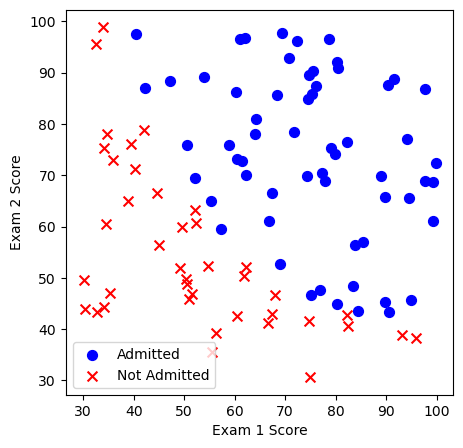

In [6]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o',
label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



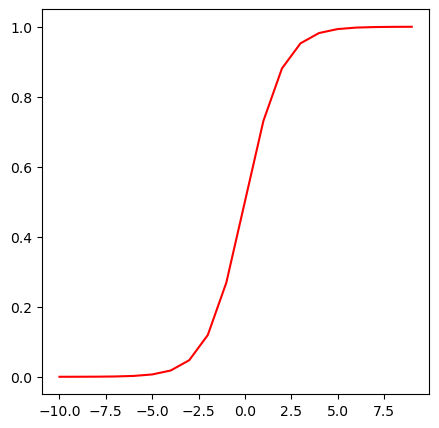

In [10]:
nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nums, sigmoid(nums), 'r')

In [13]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))



In [14]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

In [15]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [16]:
# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [17]:
print()
print('X.shape = ' , X.shape)
print('theta.shape = ' , theta.shape)
print('y.shape = ' , y.shape)


X.shape =  (100, 3)
theta.shape =  (3,)
y.shape =  (100, 1)


In [20]:
thiscost = cost(theta, X, y)
print()
print('cost = ' , thiscost)

def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    return grad




cost =  0.6931471805599453


In [21]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))

  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   2.71082898E+02
    1    3  6.318123602631536E-01   7.89087138E-01
    2    5  5.892425221302822E-01   7.39226603E+01
    3    7  4.227824068839701E-01   1.85265786E+01
    4    9  4.072926970186691E-01   1.68671133E+01
    5   11  3.818854914522947E-01   1.07735097E+01
    6   13  3.786234888874194E-01   2.31584930E+01
tnc: stepmx = 1000
    7   16  2.389268293310401E-01   3.00822027E+00
    8   18  2.047203891287692E-01   1.52227675E-01
    9   20  2.046713899074760E-01   6.62495132E-02
   10   22  2.035303163184269E-01   9.30780696E-04
tnc: fscale = 32.7775
   11   24  2.035293522095244E-01   8.07206972E-06
   12   26  2.035251114014784E-01   1.80212843E-04
   13   28  2.034984107120675E-01   5.02862434E-04
   14   30  2.034978380505887E-01   9.90612627E-06
   15   32  2.034977906457924E-01   3.77371210E-06
   16   34  2.034977387797661E-01   1.94466650E-05
   17   36  2.034977015894745E-01   2.38492699E-13


In [23]:
costafteroptimize = cost(result[0], X, y)
print()
print('cost after optimize = ' , costafteroptimize)
print()

def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)


cost after optimize =  0.20349770158947447



In [24]:
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in
zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
